Grafico Paises que producen petroleo


C:\Users\jetsf\AppData\Local\Temp\ipykernel_10364\3786321992.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


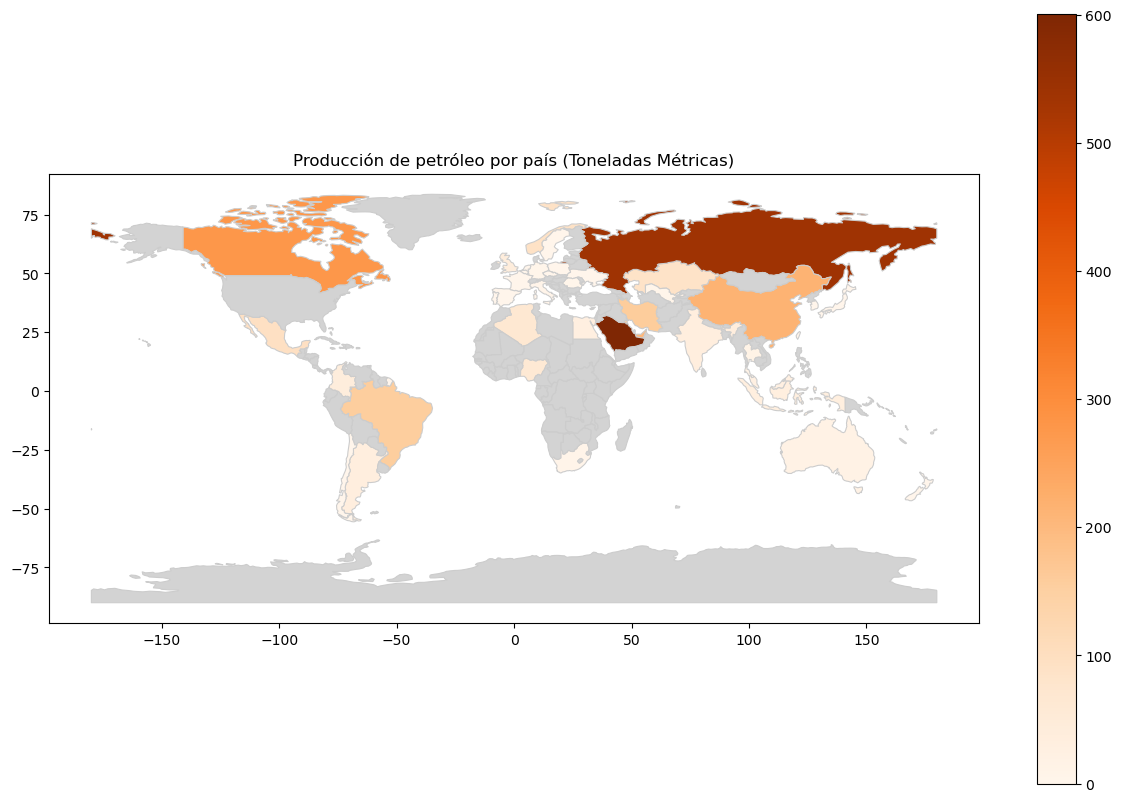

In [4]:
# Paso 1: Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Paso 2: Leer los datos del archivo CSV de producción por país
datos_produccion = pd.read_csv('C:/Users/jetsf/Downloads/datos_produccion_mundial_convertido.csv') #cambiar la direccion

# Paso 3: Preparar los datos para la visualización del mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Paso 4: Fusionar los datos con el DataFrame del mundo
merged_produccion = world.merge(datos_produccion, how='left', left_on='name', right_on='Paises')

# Paso 5: Visualizar el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Dibujar los países con datos de producción por tonelada métrica
merged_produccion.plot(column='Produccion_por_TM', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Dibujar los países que no tienen datos de producción en gris claro
world[~world['name'].isin(datos_produccion['Paises'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.set_title('Producción de petróleo por país (Toneladas Métricas)')
plt.show()


Grafico Regiones que producen petroleo

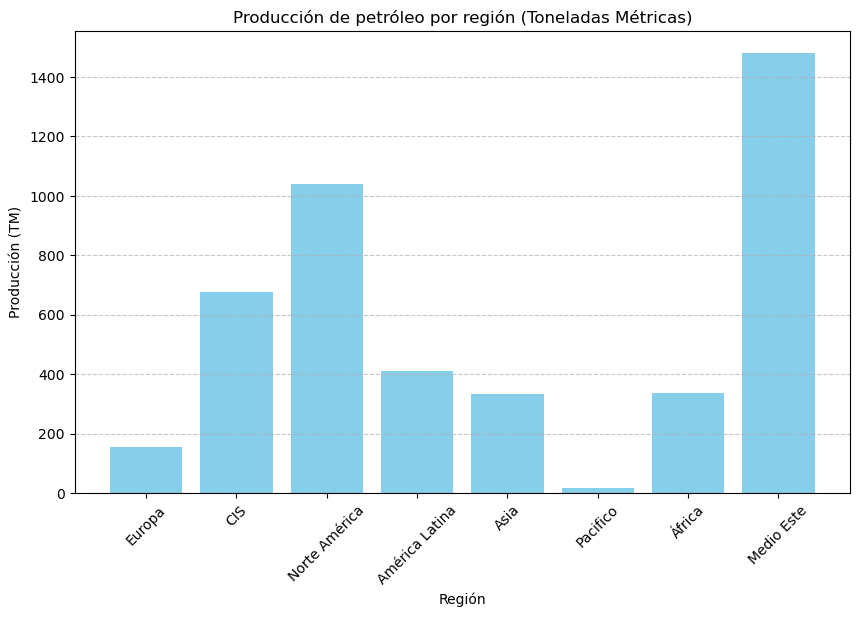

In [5]:
# Paso 1: Importar librerias
import pandas as pd
import matplotlib.pyplot as plt

# Paso 2: Definir los datos de producción por región
datos_produccion_region = {
    'Region': ['Europa', 'CIS', 'Norte América', 'América Latina', 'Asia', 'Pacifico', 'África', 'Medio Este'],
    'Produccion_por_TM': [156, 678, 1041, 411, 334, 19, 338, 1480]
}

# Paso 3: Convertir los datos a un DataFrame de pandas
df_produccion_region = pd.DataFrame(datos_produccion_region)

# Paso 4: Visualizar la gráfica
plt.figure(figsize=(10, 6))
plt.bar(df_produccion_region['Region'], df_produccion_region['Produccion_por_TM'], color='skyblue')
plt.title('Producción de petróleo por región (Toneladas Métricas)')
plt.xlabel('Región')
plt.ylabel('Producción (TM)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


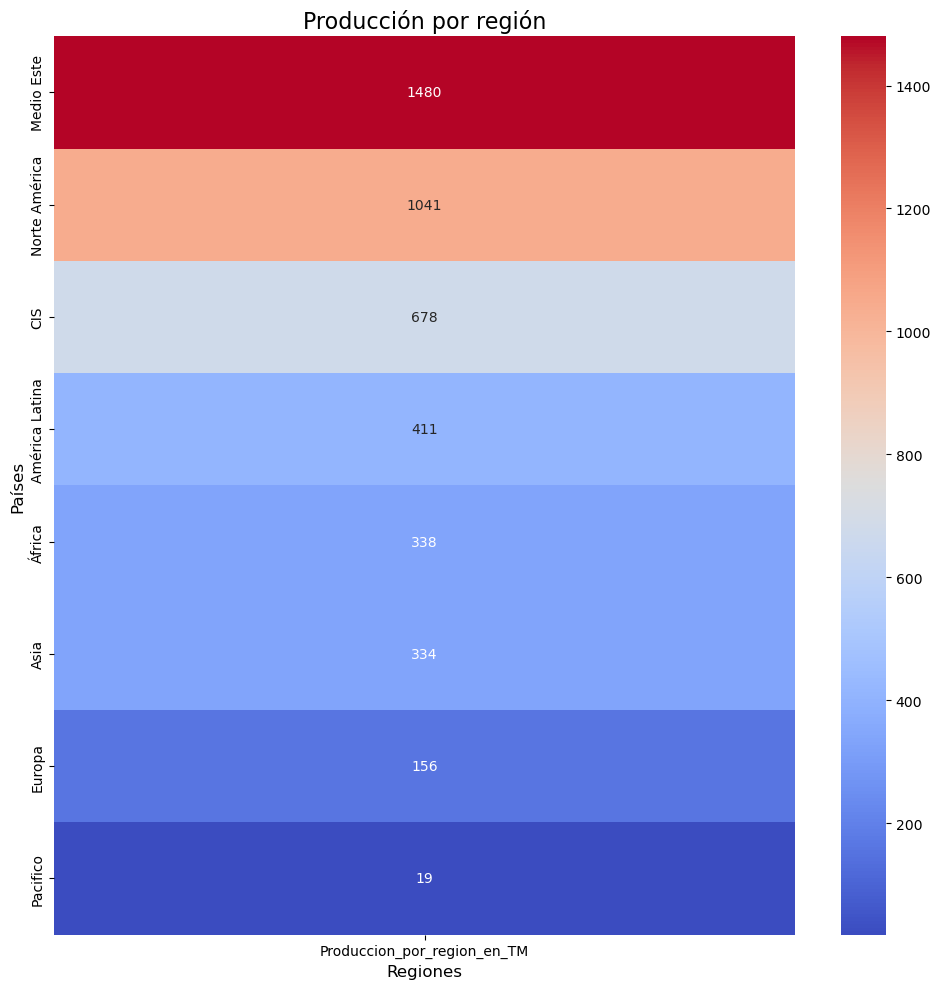

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Cargar los datos desde el archivo Excel en un DataFrame de pandas, aqui lo haremos directo
data = """
Paises,Produccion_por_region_en_TM
Europa,156
CIS,678
Norte América,1041
América Latina,411
Asia,334
Pacifico,19
África,338
Medio Este,1480
"""
df = pd.read_csv(StringIO(data))

# Ordenar los datos por 'Produccion_por_region_en_TM'
df_sorted = df.sort_values('Produccion_por_region_en_TM', ascending=False)

# Crear un mapa de calor
plt.figure(figsize=(10, 10))
sns.heatmap(df_sorted.set_index('Paises'), cmap='coolwarm', annot=True, fmt='.0f')

# Agregar títulos y etiquetas
plt.title('Producción por región', fontsize=16)
plt.xlabel('Regiones', fontsize=12)
plt.ylabel('Países', fontsize=12)

# Mostrar el mapa de calor
plt.tight_layout()
plt.show()

Grafico Paises que compran petroleo


C:\Users\jetsf\AppData\Local\Temp\ipykernel_10364\2522252842.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


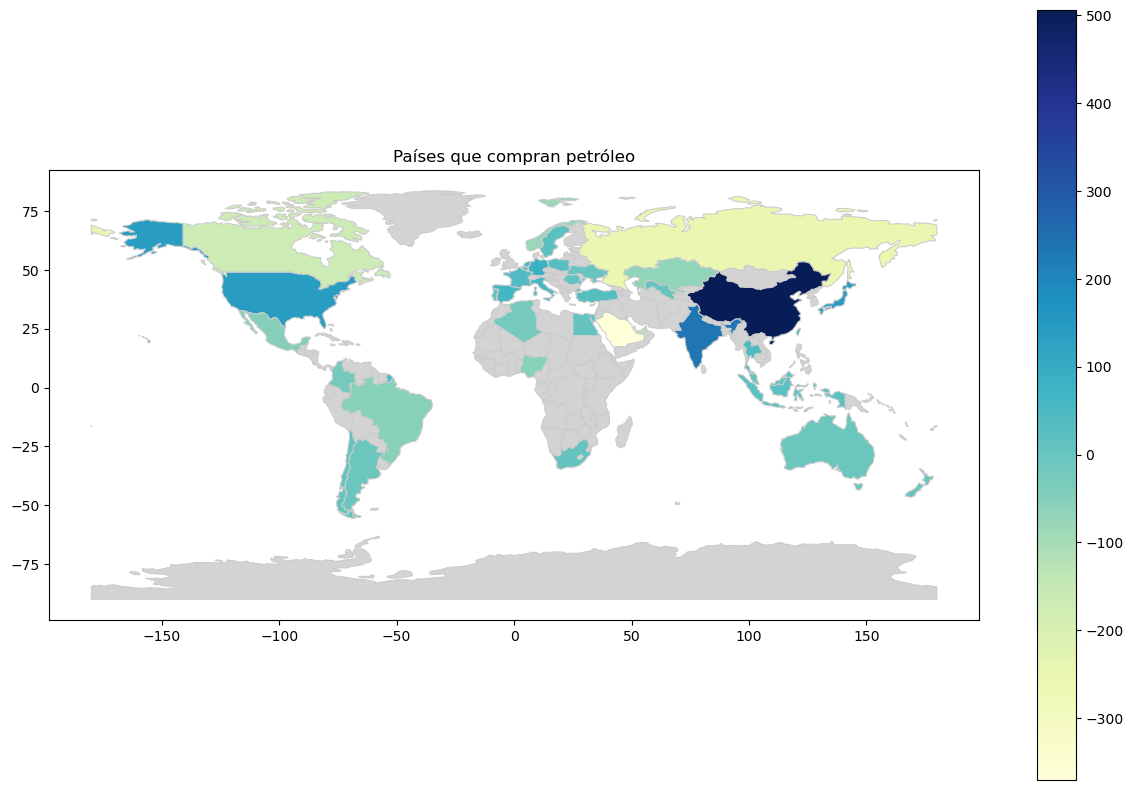

In [3]:
# Paso 1: Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Paso 2: Leer los datos del archivo CSV
datos = pd.read_csv('C:/Users/jetsf/Downloads/compras.csv') #cambiar la direccion

# Paso 3: Preparar los datos para la visualización del mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Paso 4: Fusionar los datos con el DataFrame del mundo
merged = world.merge(datos, how='left', left_on='name', right_on='Paises')

# Paso 5: Visualizar el mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Dibujar los países con datos de compras de petróleo
merged.plot(column='Petroleo_Comprado', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Dibujar los países que no tienen datos de compras de petróleo en gris claro
world[~world['name'].isin(datos['Paises'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.set_title('Países que compran petróleo')
plt.show()

Grafico Precio del Petroleo desde el 2000 a 2024 en Dolares y Euros + Prediccion del precio dentro de un mes 

In [15]:
import pandas as pd
import altair as alt
from sklearn.linear_model import LinearRegression

# Cargar los datos desde el archivo CSV
file_path = "C:/Users/jetsf/Downloads/datos.csv" #cambiar la direccion
data = pd.read_csv(file_path)

# Convertir la columna de fechas a formato de fecha y redondear al primer día de cada mes
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')

# Convertir las fechas en días transcurridos desde una fecha inicial
data['Days'] = (data['Fecha'] - data['Fecha'].min()).dt.days

# Eliminar el símbolo "$" de las columnas 'Precioendolares' y 'Precioeneuros' y convertirlas a tipo float
data['Precioendolares'] = data['Precioendolares'].replace({'\$': ''}, regex=True).astype(float)
data['Precioeneuros'] = data['Precioeneuros'].replace({'\$': ''}, regex=True).astype(float)

# Concatenar los datos para trazar en una sola gráfica
melted_data = data.melt(id_vars='Fecha', value_vars=['Precioendolares', 'Precioeneuros'], 
                        var_name='Moneda', value_name='Precio')

# Inicializar y entrenar el modelo de regresión lineal para el precio en dólares
model_dolares = LinearRegression()
model_dolares.fit(data[['Days']], data['Precioendolares'])

# Inicializar y entrenar el modelo de regresión lineal para el precio en euros
model_euros = LinearRegression()
model_euros.fit(data[['Days']], data['Precioeneuros'])

# Obtener el último día registrado en los datos
ultimo_dia = data['Days'].max()

# Calcular el primer día de abril si en el parentesis se pone 0 el programa se bugea no hacer 
primer_dia_abril = data['Fecha'].max() + pd.offsets.MonthBegin(1)

# Crear un DataFrame con el primer día de abril para hacer la predicción
next_day_df = pd.DataFrame({'Days': [(primer_dia_abril - data['Fecha'].min()).days]})

# Hacer la predicción para el primer día de abril en dólares
precio_predicho_dolares = model_dolares.predict(next_day_df)

# Hacer la predicción para el primer día de abril en euros
precio_predicho_euros = model_euros.predict(next_day_df)

# Crear un DataFrame con la predicción para graficarla como un punto probable
prediccion_df = pd.DataFrame({'Fecha': [primer_dia_abril], 
                              'Precioendolares': precio_predicho_dolares,
                              'Precioeneuros': precio_predicho_euros})

# Graficar los datos históricos y la predicción
historico = alt.Chart(melted_data).mark_line(point=True).encode(
    x=alt.X('Fecha:T', title='Fecha', axis=alt.Axis(format='%b %Y')),  # Mostrar solo el mes y el año en el eje x
    y=alt.Y('Precio:Q', title='Precio'),
    color=alt.Color('Moneda:N', title='Moneda', scale=alt.Scale(range=['blue', 'red'])),
    tooltip=['Fecha:T', alt.Tooltip('Precio:Q', title='Precio')]
).properties(
    title='Precio en Euros y Dólares a lo largo del tiempo',
    width=800,
    height=400
)

prediccion_dolares = alt.Chart(prediccion_df).mark_point(color='green').encode(
    x='Fecha:T',
    y='Precioendolares:Q'
)

prediccion_euros = alt.Chart(prediccion_df).mark_point(color='purple').encode(
    x='Fecha:T',
    y='Precioeneuros:Q'
)

grafico = historico + prediccion_dolares + prediccion_euros

grafico.interactive()


alt.LayerChart(...)

Grafico Con Eventos

In [14]:
import pandas as pd
import altair as alt
from sklearn.linear_model import LinearRegression

# Cargar los datos desde el archivo CSV
file_path = "C:/Users/jetsf/Downloads/datosv2.csv"#cambiar la direccion
data = pd.read_csv(file_path, encoding='latin1')


# Convertir la columna de fechas a formato de fecha y redondear al primer día de cada mes
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')

# Convertir las fechas en días transcurridos desde una fecha inicial
data['Days'] = (data['Fecha'] - data['Fecha'].min()).dt.days

# Eliminar el símbolo "$" de las columnas 'Precioendolares' y 'Precioeneuros' y convertirlas a tipo float
data['Precioendolares'] = data['Precioendolares'].replace({'\$': ''}, regex=True).astype(float)
data['Precioeneuros'] = data['Precioeneuros'].replace({'\$': ''}, regex=True).astype(float)

# Concatenar los datos para trazar en una sola gráfica
melted_data = data.melt(id_vars=['Fecha', 'Evento'], value_vars=['Precioendolares', 'Precioeneuros'], 
                        var_name='Moneda', value_name='Precio')

# Inicializar y entrenar el modelo de regresión lineal para el precio en dólares
model_dolares = LinearRegression()
model_dolares.fit(data[['Days']], data['Precioendolares'])

# Inicializar y entrenar el modelo de regresión lineal para el precio en euros
model_euros = LinearRegression()
model_euros.fit(data[['Days']], data['Precioeneuros'])

# Obtener el último día registrado en los datos
ultimo_dia = data['Days'].max()

#  Calcular el primer día de abril si en el parentesis se pone 0 el programa se bugea no hacer
primer_dia_abril = data['Fecha'].max() + pd.offsets.MonthBegin(1)

#  Crear un DataFrame con el primer día de abril para hacer la predicción
next_day_df = pd.DataFrame({'Days': [(primer_dia_abril - data['Fecha'].min()).days]})

# Hacer la predicción para el primer día de abril en dólares
precio_predicho_dolares = model_dolares.predict(next_day_df)

# Hacer la predicción para el primer día de abril en euros
precio_predicho_euros = model_euros.predict(next_day_df)

# Crear un DataFrame con la predicción para graficarla como un punto probable
prediccion_df = pd.DataFrame({'Fecha': [primer_dia_abril], 
                              'Precioendolares': precio_predicho_dolares,
                              'Precioeneuros': precio_predicho_euros})

# Graficar los datos históricos y la predicción
historico = alt.Chart(melted_data).mark_line(point=True).encode(
    x=alt.X('Fecha:T', title='Fecha', axis=alt.Axis(format='%b %Y')),  # Mostrar solo el mes y el año en el eje x
    y=alt.Y('Precio:Q', title='Precio'),
    color=alt.Color('Moneda:N', title='Moneda', scale=alt.Scale(range=['blue', 'red'])),
    tooltip=['Fecha:T', alt.Tooltip('Precio:Q', title='Precio'), 'Evento:N']
).properties(
    title='Precio en Euros y Dólares a lo largo del tiempo',
    width=800,
    height=400
)

prediccion_dolares = alt.Chart(prediccion_df).mark_point(color='green').encode(
    x='Fecha:T',
    y='Precioendolares:Q'
)

prediccion_euros = alt.Chart(prediccion_df).mark_point(color='purple').encode(
    x='Fecha:T',
    y='Precioeneuros:Q'
)

grafico = historico + prediccion_dolares + prediccion_euros

grafico.interactive()


alt.LayerChart(...)